In [1]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn

In [2]:
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


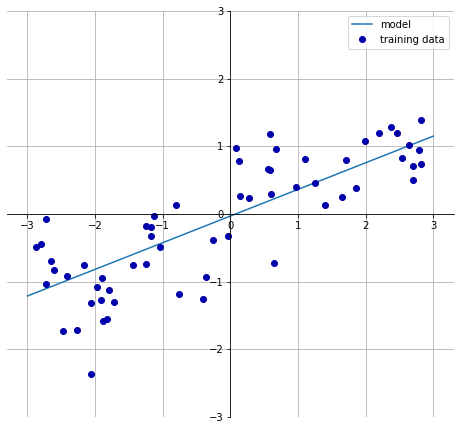

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [6]:
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

training set score: 0.67
test set score: 0.66


In [7]:
# with Boston dataset
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

training set score: 0.95
test set score: 0.61


## Ridge Regression

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

training set score: 0.89
test set score: 0.75


In [9]:
# amend the alpha
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

training set score: 0.79
test set score: 0.64


In [10]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

training set score: 0.93
test set score: 0.77


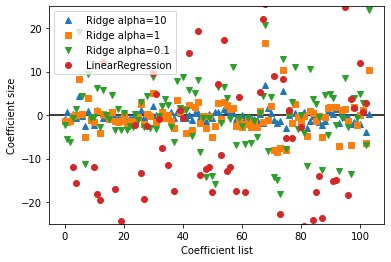

In [11]:
plt.plot(ridge10.coef_,'^', label="Ridge alpha=10")
plt.plot(ridge.coef_,'s', label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient list")
plt.ylabel("Coefficient size")
xlims = plt.xlim()
plt.hlines(0,xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

we also can fix the alpha and amend the size of the training data for understanding effects of regularization

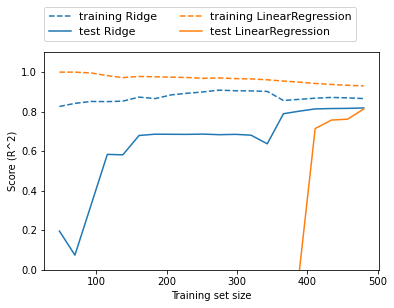

In [12]:
mglearn.plots.plot_ridge_n_samples()

## Lasso

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("the number of features used:", np.sum(lasso.coef_ != 0))

training set score: 0.29
test set score: 0.21
the number of features used: 4


In [14]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("the number of features used:", np.sum(lasso001.coef_ != 0))

training set score: 0.90
test set score: 0.77
the number of features used: 33


In [15]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("the number of features used:", np.sum(lasso00001.coef_ != 0))

training set score: 0.95
test set score: 0.64
the number of features used: 96


Text(0, 0.5, 'coefficient size')

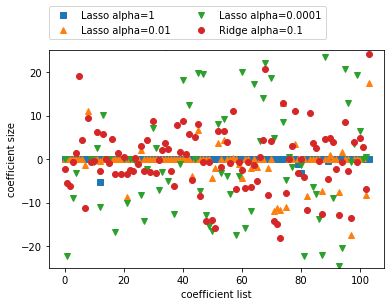

In [16]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25, 25)
plt.xlabel("coefficient list")
plt.ylabel("coefficient size")

## Linear model for classification

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


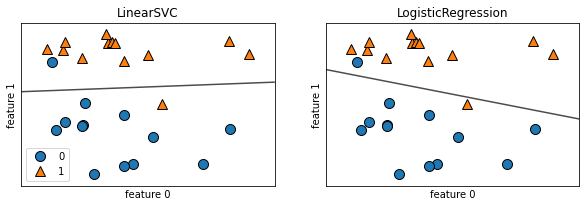

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

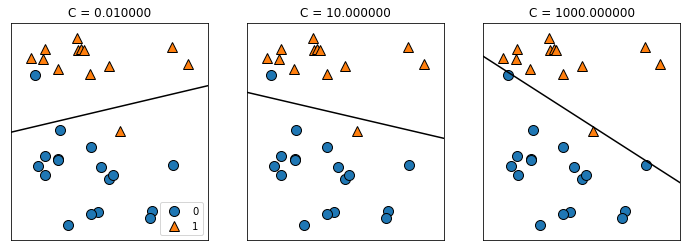

In [18]:
mglearn.plots.plot_linear_svc_regularization()

In [19]:
# using cancer data set
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("test set score: {:.3f}".format(logreg.score(X_test, y_test)))

training set score: 0.948
test set score: 0.958


/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

training set score: 0.946
test set score: 0.958


/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

training set score: 0.934
test set score: 0.930


/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


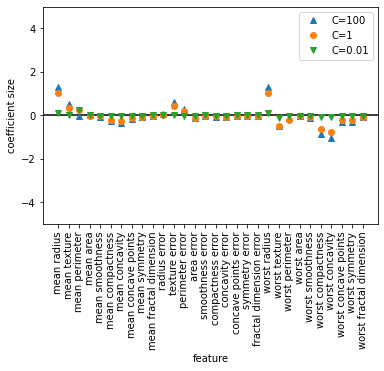

In [22]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coefficient size")
plt.legend()

training accuracy of logistic Regression on C=0.001: 0.91
test accuracy of logistic Regression on C=0.001: 0.92
training accuracy of logistic Regression on C=1.000: 0.96
test accuracy of logistic Regression on C=1.000: 0.96
training accuracy of logistic Regression on C=100.000: 0.99
test accuracy of logistic Regression on C=100.000: 0.98


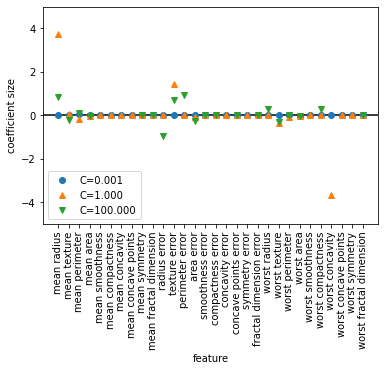

In [23]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1").fit(
        X_train, y_train)
    print("training accuracy of logistic Regression on C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("test accuracy of logistic Regression on C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coefficient size")
plt.legend(loc=3)

## Multi classification lineal model
- the most general way to switch binary to multi is "one-vs-rest"
- 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진분류 모델을 학습시킨다.
- 즉, 클래스 수 만큼 이진 분류 모델이 생성됨.
- 생성된 모든 이진분류기가 작동하여, 가장 높은 점수를 내는 분류기의 클래스를 예측값(Y hat)으로 선택한다.
- 클래스별 이진분류기를 만들면 각 클래스가 계수벡터(w)와 절편(b)을 하나씩 갖게 됨.

/home/hyunjong/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunjong/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunjong/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunjong/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunjong/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunjong/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

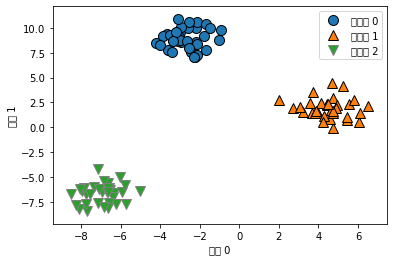

In [24]:
# 세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식 적용
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [25]:
linear_svm = LinearSVC().fit(X, y)
print("size of the coefficient arrangement: ", linear_svm.coef_.shape)
print("size of the intercept arrangement: ", linear_svm.intercept_.shape)

size of the coefficient arrangement:  (3, 2)
size of the intercept arrangement:  (3,)


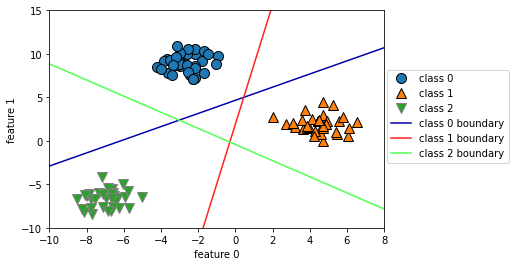

In [26]:
# visualization of boundary
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                  linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", 
            "class 1 boundary", "class 2 boundary"], loc=(1.01, 0.3))

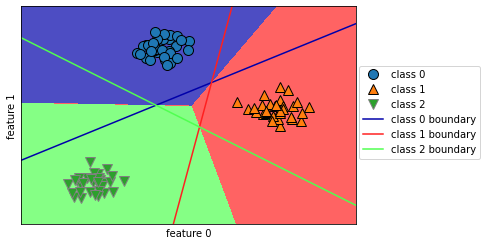

In [28]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                  linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", 
            "class 1 boundary", "class 2 boundary"], loc=(1.01, 0.3))